This notebook is for creating animations and timeseries with the ABI data

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Proj
from datetime import datetime
import imageio as img
import os

In [11]:
#Constants
source = '/localdata/cases/20190527_1/ABI/CTPC/'
save_location = '/localdata/cases/20190527_1/ABI/CTPC_pics/'

nw_lat=43.48
nw_lon=-104.61
se_lat=38.26
se_lon=-96.47

In [1]:
def cutup(nc_file,var,nw_lat,nw_lon,se_lat,se_lon):
    #Getting the Satellite info
    sat_h = nc_file.variables['goes_imager_projection'].perspective_point_height
    sat_lon = nc_file.variables['goes_imager_projection'].longitude_of_projection_origin
    sat_sweep = nc_file.variables['goes_imager_projection'].sweep_angle_axis
    
    #Creating the projection conversion
    p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)
    
    #Getting the XY datapoints setup
    X = nc_file.variables['x'][:] * sat_h
    Y = nc_file.variables['y'][:] * sat_h
    XX, YY = np.meshgrid(X, Y)
    
    #Conversion to lat/lon
    lons, lats = p(XX, YY, inverse=True)
    
    #Cutting doing the variable
    locations = (lons<se_lon) &  (lons>nw_lon) & (lats<nw_lat) & (lats>se_lat)
    cut_var = var[locations]
    
    return cut_var

cut_var = cutup(ABI,var,nw_lat,nw_lon,se_lat,se_lon)

NameError: name 'ABI' is not defined

In [15]:
#Reading in files to create a timeseries
var_max = np.empty(0)
var_min = np.empty(0)
time = np.empty(0)
for i in os.listdir(source):
    ABI = nc.Dataset(source+i, 'r')
    var = ABI.variables['PRES'][:,:]
    var_max = np.append(var_max, np.max(var))
    var_min = np.append(var_min, np.min(var))
    
    time_string = ABI.time_coverage_end
    time = np.append(time, datetime.strptime(time_string, '%Y-%m-%dT%H:%M:%S.%fZ'))
    

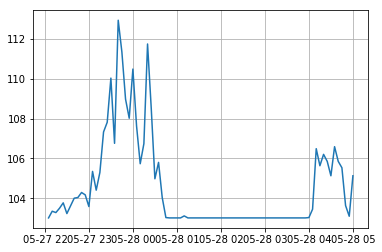

1019.7119140625
103.01697540283203


In [17]:
#Quick Readout
#plt.plot(time,var_max)
plt.plot(time,var_min)
plt.grid(True)
plt.show()
print (np.max(var_max))
print (np.min(var_min))

In [4]:
ABI

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 10km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: CONUS
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-CTPC-M6_G16_s20191472201379_e20191472204152_c20191472205455.nc
    iso_series_metadata_id: aa36b140-b00d-11e1-afa6-0800200c9a66
    title: ABI L2 Cloud Top Pressure
    summary: The Cloud Top Pressure product consists of the pressure at the top of clo

In [9]:
bounds = np.arange(100,1100,50)

In [12]:
for i in sorted(os.listdir(source)):
    ABI = nc.Dataset(source+i, 'r')
    var = ABI.variables['PRES'][:,:]
    x = ABI.variables['x'][:]
    y = ABI.variables['y'][:]
    time_string = ABI.time_coverage_end
    time = datetime.strptime(time_string, '%Y-%m-%dT%H:%M:%S.%fZ')
    YYYY = time.strftime('%Y')
    mm = time.strftime('%m') #month
    DD = time.strftime('%D')
    dd = time.strftime('%d')
    HH = time.strftime('%H')
    MM = time.strftime('%M') #Minute
    
    plt.figure(figsize=(14, 6))
    ax = plt.axes(projection=ccrs.Geostationary(-75, 35786023.0))

    plt.contourf(x*35786023.0,y*35786023.0,var,cmap=plt.get_cmap('gnuplot2'),alpha=0.8,levels=bounds)
    ax.set_extent([nw_lon, se_lon, se_lat, nw_lat])
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.STATES, zorder=9)
    cbar = plt.colorbar()
    
    cbar.set_label('Cloud Top Pressures (hPa)')
    plt.title('ABI Cloud Top Pressures (CTP)',loc='left')
    plt.title(DD+'  '+HH+':'+MM, loc='right')
    plt.savefig(save_location+YYYY+mm+dd+HH+MM)
    plt.close()
    print (HH+MM)

2204
2209
2214
2219
2224
2229
2234
2239
2244
2249
2254
2259
2304
2309
2314
2319
2324
2329
2334
2339
2344
2349
2354
2359
0004
0009
0014
0019
0024
0029
0034
0039
0044
0049
0054
0059
0104
0109
0114
0119
0124
0129
0134
0139
0144
0149
0154
0159
0204
0209
0214
0219
0224
0229
0234
0239
0244
0249
0254
0259
0304
0309
0314
0319
0324
0329
0334
0339
0344
0349
0354
0359
0404
0409
0414
0419
0424
0429
0434
0439
0444
0449
0454
0459


In [13]:
pics = []
for i in sorted(os.listdir(save_location)):
    pics.append(img.imread(save_location+i))

img.mimsave(save_location+'animation.gif', pics , format='gif', loop=0, duration=0.1, subrectangles=True)